In [1]:
# Netflix Titles Data Analysis

# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="darkgrid")


In [2]:
# Step 2: Load the Dataset
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Step 3: Basic Info and Null Values
print("Dataset Info:")
df.info()

print("\nMissing Values:")
df.isnull().sum()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# Step 4: Data Cleaning
# Drop rows with missing titles or types
df.dropna(subset=['type', 'title'], inplace=True)

# Fill 'country' and 'rating' missing values
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)

# Fill 'date_added' with the most frequent date
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year


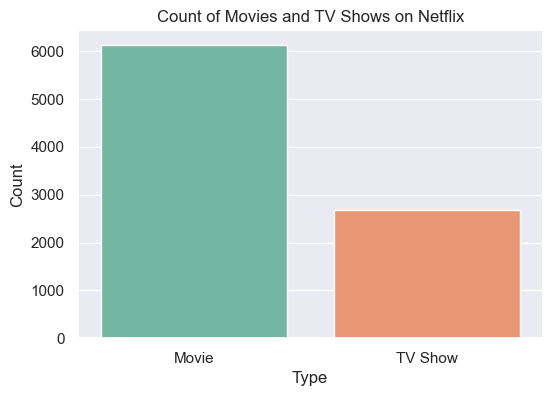

In [5]:
# Step 5: Content Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Count of Movies and TV Shows on Netflix')
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


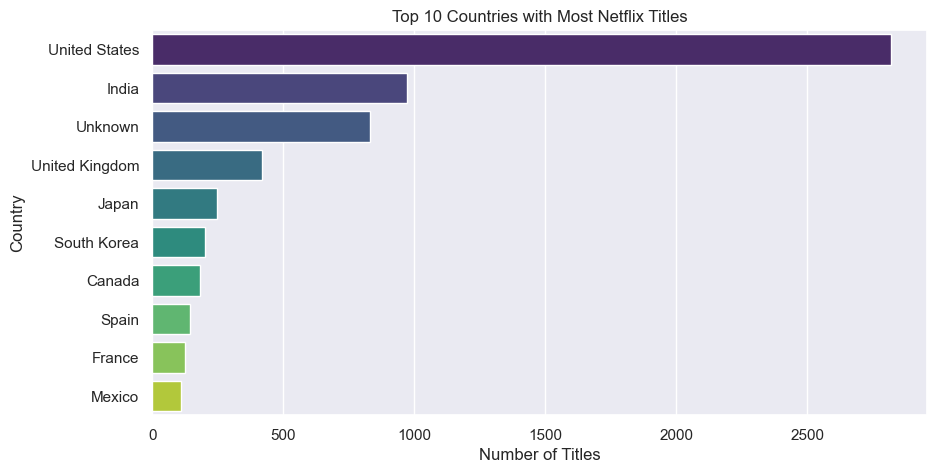

In [6]:
# Step 6: Top 10 Countries by Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


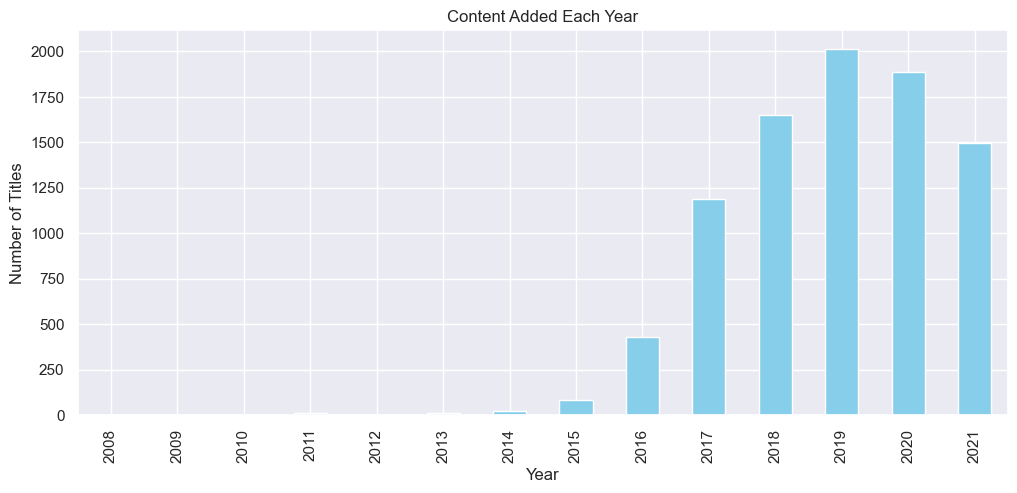

In [7]:
# Step 7: Content Added Over Time
plt.figure(figsize=(12,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Content Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


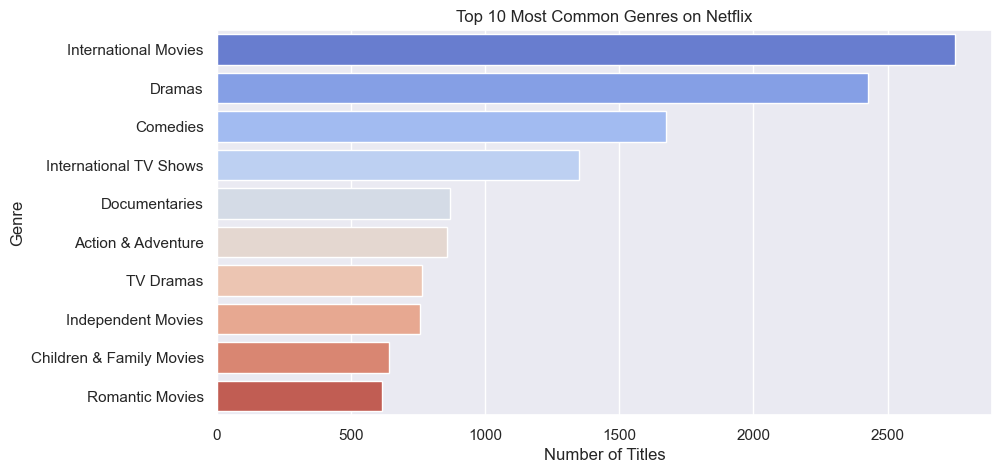

In [8]:
# Step 8: Most Common Genres
all_genres = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


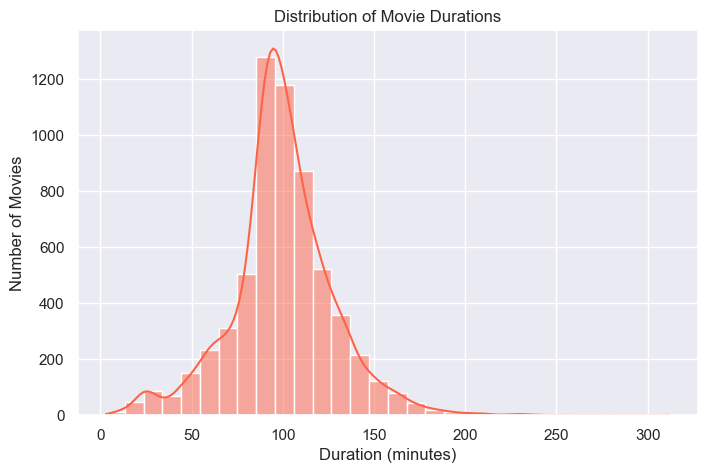

In [9]:
# Step 9: Movie Duration Distribution
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(8,5))
sns.histplot(movie_df['duration'], bins=30, kde=True, color='tomato')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()
